# H.E.R.M.E.S.

# Heuristic Enabled Rapid Modular Evolutionary Search

## Set-up

### Notebook Set-up

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# Setup base directory
import os
import os.path
import sys
sys.path.append(os.path.join(os.getcwd(), '../..'))

import json

### Imports

In [2]:
from src.EACore.EAVarHelper import EAVarHelper
from src.EACore.EARunner import EARunner
from src.Setups.TSP.FileLoader import LoadHelper
from src.Setups.TSP.EAFactory import EAFactory
from src.Setups.TSP.PopulationInitialization import PopulationInitializationGenerator
from src.Setups.TSP.FitnessEvaluator import FitnessHelperGenerator

### Configuration

#### Global Variables

 - `maximization`: Where the problem is a maximization or a minimization problem
 - `test_all`: Whether to use the methods provided, or to iteratively test every combination of methods
 - `methods`: Determines which method will be used for each part of the algorithm
 - `use_db`: Whether or not to save results to an SQLite3 database
 - `db_name`: Filename for SQLite3 database (if use_db is true)
 - `print_stats`: Whether or not to print results to the console as they are produced
 - `generation_limit`: The number of generations that the algorithm runs for
 - `report_rate`: The number of generations to run between displaying and outputting stats
 - `runs`: The number of times to run the algorithm
 - `data_set`: The input data to use (0: Sahara, 1: Uruguay, 2: Canada)
 - `data_type`: The data structure to use for storing individuals (0: Lists, 1: Numpy Arrays, 2: C Arrays)

#### Modular Function Definitions

The `EACore` is module which contains the class `EARunner`. This is a general shell that is designed to handle many different problems, and is not limited to the Travelling Salesperson Problem. To solve a different problem, you need to provide a new population initialization method, a new fitness evaluation method, and a data set. Other methods are problem agnostic.

The methods used by the algorithm are determined by the `methods` list provided in the configuration file. Here is a table of the functions you can choose from.

**Fitness Evaluation**  
0: Euclidean  

**Population Initialization**  
0: Random  
1: Cluster  
2: Euler  

**Parent Selection**  
0: MPS  
1: Tournament Selection  
2: Random Selection

**Recombination**  
0: Order Crossover  
1: PMX Crossover  

**Mutation**  
0: Swap  
1: Insert  
2: Inversion  
3: Shift  

**Survivor Selection**  
0: Mu + Lambda  
1: Replacement  

**Population Management**  
0: None  
1: Metalleurgic Annealing  
2: Entropic Stabilizing  
3: Ouroboric Culling  
4: Genetic Engineering  

In [3]:
config_json = """{
    "maximization": false,
    "test_all": false,
    "methods": [0, 2, 1, 1, 2, 0, 0],
    "use_db": false,
    "print_stats": true,
    "db_name": "stats.db",
    "generation_limit": 5000,
    "report_rate": 500,
    "runs": 1,
    "data_set": 1,
    "data_type": 2
}"""

config = json.loads(config_json)

### Create EA Runner

In [4]:
factory = EAFactory(config["data_set"], config["maximization"])
ea = factory.make_ea_runner(config["data_type"], config["methods"])

Loaded: TSP_Sahara_Dists.txt


With all imports and object initializations out of the way, we can run the EA with a single function call: `run()`

`run()` takes in a few arguments, the only non-optional one being the `generation_limit`. The other arguments are for hw often a generation summary should be printed, the best fitness found, whether that fitness is the true optimum, and a mute boolean, for if the EA is being multi-threaded (so the outputs don't clash and clutter the terminal).

`run()` returns the best fitnees found, the idividuals with that fitness, the generation it ended on (in case of early convergence), a history of best individuals over the generations, and a tuple with the results of clocking the functions.

In [5]:
fitness, indiv, end = ea.run(config["generation_limit"], print_stats=config["print_stats"], report_rate=config["report_rate"])
pass

Population initialization:   Euler                    Parent selection:            Tourney                  
Recombination Method:        PMX Crossover            Mutation Method:             Inversion                
Survivor selection:          Mu + Lambda              Management Method:           None                     
Loaded: TSP_Sahara_MST.txt
Generation: 500
  Best fitness: 28470.10133994028
  Avg. fitness: 28470.10133994027
  Copies of Best: 60
Generation: 1000
  Best fitness: 28470.10133994028
  Avg. fitness: 28470.10133994027
  Copies of Best: 60
Generation: 1500
  Best fitness: 28470.10133994028
  Avg. fitness: 28470.10133994027
  Copies of Best: 60
Generation: 2000
  Best fitness: 28470.10133994028
  Avg. fitness: 28470.10133994027
  Copies of Best: 60
Generation: 2500
  Best fitness: 28470.10133994028
  Avg. fitness: 28470.10133994027
  Copies of Best: 60
Generation: 3000
  Best fitness: 28470.10133994028
  Avg. fitness: 28470.10133994027
  Copies of Best: 60
Generation:

### Simple Plotting

Here we set up a class which helps handle the plotting for the data.

In [6]:
from src.Setups.TSP.TSP_Display import GraphingHelper
grapher = GraphingHelper(config["data_set"])

This plots the locations of the cities, and colours them by index.

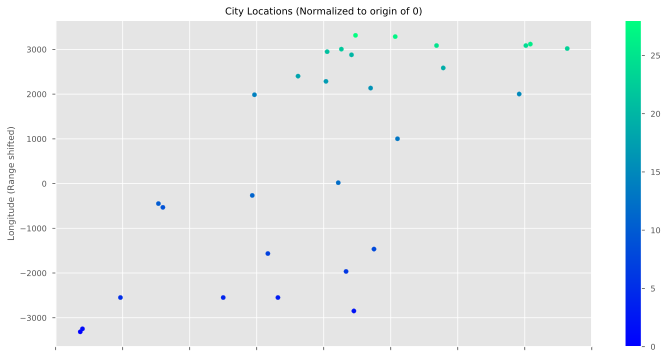

In [7]:
grapher.start_up_display()

This displays the path that the EA computed.

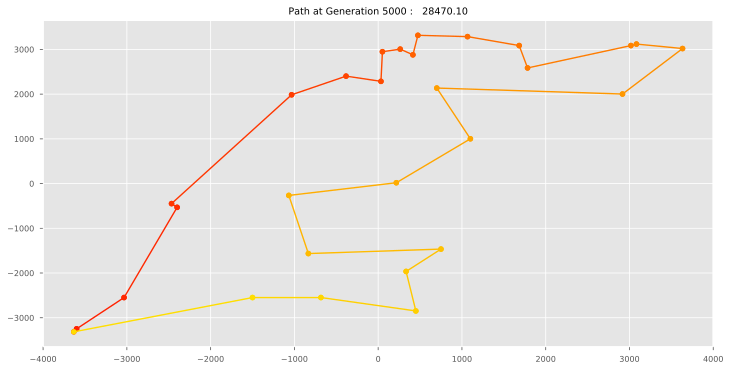

In [8]:
grapher.alt_generation_display(end, fitness, indiv)

### Configure Parameters

Parameters can be changed between runs. Parameters are stored in `ea.vars`. Here I will demonstrate increasing the population threshold (the number of copies of the best individual that may exist before population management begins replacing them), and the mutation rate to increase diversity.

In [9]:
ea.vars.set_population_threshold_by_percent(0.70)
ea.vars.mutation_rate = 0.60
ea.run(config["generation_limit"], print_stats=config["print_stats"], report_rate=config["report_rate"])
pass

Population initialization:   Euler                    Parent selection:            Tourney                  
Recombination Method:        PMX Crossover            Mutation Method:             Inversion                
Survivor selection:          Mu + Lambda              Management Method:           None                     
Generation: 500
  Best fitness: 29050.62357922303
  Avg. fitness: 29050.623579223007
  Copies of Best: 60
Generation: 1000
  Best fitness: 29050.62357922303
  Avg. fitness: 29050.623579223007
  Copies of Best: 60
Generation: 1500
  Best fitness: 29050.62357922303
  Avg. fitness: 29050.623579223007
  Copies of Best: 60
Generation: 2000
  Best fitness: 29050.62357922303
  Avg. fitness: 29050.623579223007
  Copies of Best: 60
Generation: 2500
  Best fitness: 29050.62357922303
  Avg. fitness: 29050.623579223007
  Copies of Best: 60
Generation: 3000
  Best fitness: 29050.62357922303
  Avg. fitness: 29050.623579223007
  Copies of Best: 60
Generation: 3500
  Best fitness: